# 从感知机到神经网络

这是一个例子：

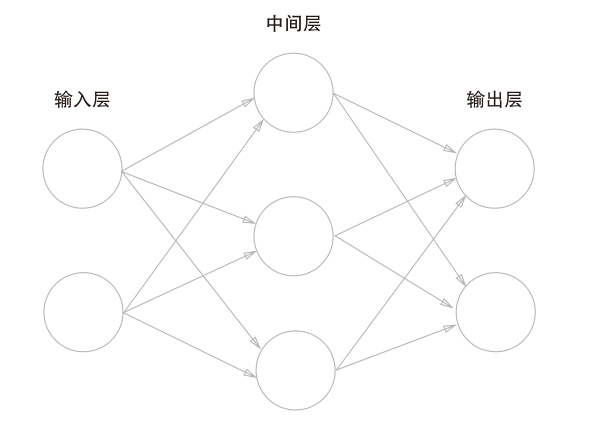

我们将最左边的一个列称为输入层，中间的称为中间层，最右边的列称为输出层。

中间层有时候也被称隐藏层，隐藏层的意思是对外是不可见的，输入层需要有输入，输入是可见的，输出层需要输出结果，输出也是可见的。

在这张图里，标记为“中间层”的层和“输出层”的层之间的连接代表这两层之间有权重。同样，标记为“输入层”的层和“中间层”的层之间的连接也代表这两层之间有权重。

所以我们将这个神经网络称为2层神经网络。

复习一下感知机

这是一个感知机：

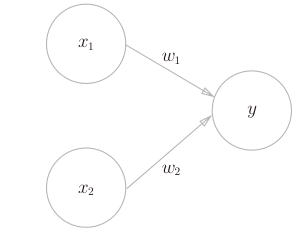

数学公式为：

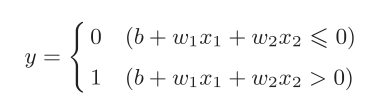

b是被称为偏置的参数，用来控制神经元被激活的难易程度；而w1和w2是表示各个信号的权重的参数，用于控制各个信号的重要性。

如果要将偏置项会绘制出来，则如下图所示：

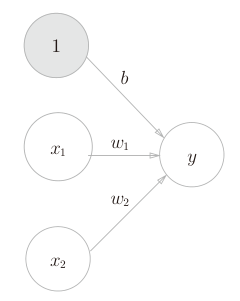

我们可以将上面的公式改写成更加简介的形式： 

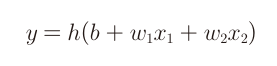

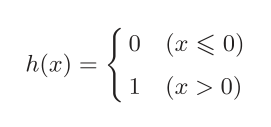

输入信号的总和会被函数h(x)转换，转换后的值就是输出y。

然后，函数h(x)，在输入超过0时返回1，否则则返回0。

h(x)会将输入信号的总和转换为输出信号，这种函数一般被称为激活函数（activation function）。

上面的公式可以改写成两个阶段：

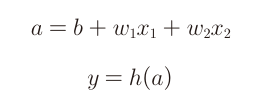

可以这样进行可视化：

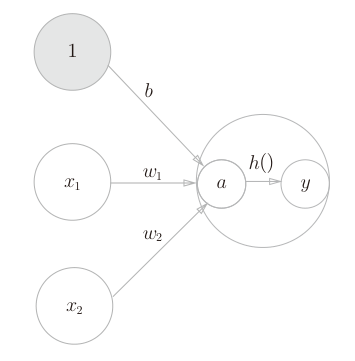

信号的加权总和和偏置项的和为a，然后a被激活函数转换为数值，成为y，然后输出y。

# 激活函数

基于该函数：

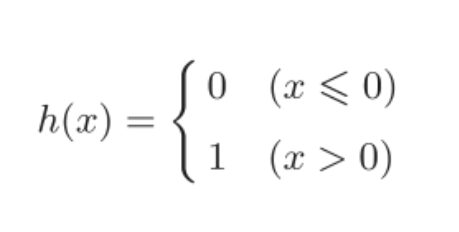

激活函数以阈值为界，一旦输入超过了阈值，就切换输出，这样的函数被称为跃迁函数。

sigmoid函数：

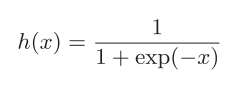

上述公式中的exp(-x)是 $e^{-x}$ 的意思，而e是纳皮尔常数，神经网络通常使用这个函数作为激活函数，来进行信号转换，被转换后的信号被传给下一个神经元。

In [268]:
# 实现跃迁函数
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

上述这个实现是简单的，但是参数x只能够接受实数（浮点数），比如说step_function(3.0)，但是无法接受np.array()数组，比如说step_function(np.array([1.0, 2.0]))。

为了方便之后的操作，我们可以将函数修改为支持numpy的实现：

In [269]:
# 支持numpy
def step_function(x):
    y = x > 0  # 因为在计算机中，True和1，False和0，是等价的
    return y.astype(np.int32)

上面的函数中的 y = x > 0，使用了python的技巧，并且使用了numpy的广播机制：

In [270]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [271]:
y = x > 0

In [272]:
y

array([False,  True,  True])

输出的结果y是一个布尔类型，但是为了方便我们之后的运算，我们要将其转换为int类型：

In [273]:
y = y.astype(np.int32)
y

array([0, 1, 1])

注意，新版的numpy中np.int已经被一处了，需要指定精度，np.int32或者np.int64。

接着对跃迁函数进行可视化：

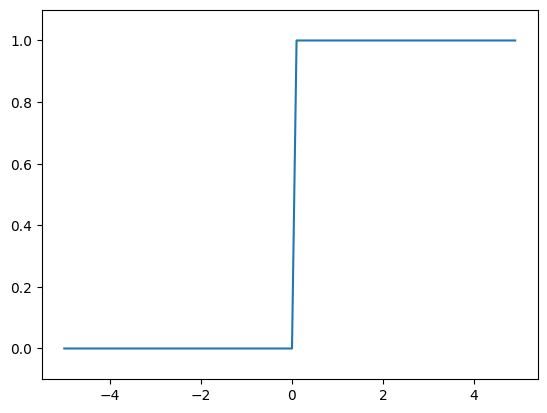

In [274]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int32)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

这是一个跃迁函数，界限为0，当输出从0切换到1的时候，它的值呈现出了阶梯式变化，所以被称为是跃迁函数。

接着实现的是sigmoid函数：

In [275]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

这里的`np.exp(-x)`对应的是 $exp^{-x}$。

In [276]:
# 进行测试
x_test = np.array([-1.0, 1.0, 2.0])
sigmoid(x_test)

array([0.26894142, 0.73105858, 0.88079708])

sigmoid函数的实现能够支持numpy数组，重点还是在于numpy的广播功能。

然后还是进行可视化：

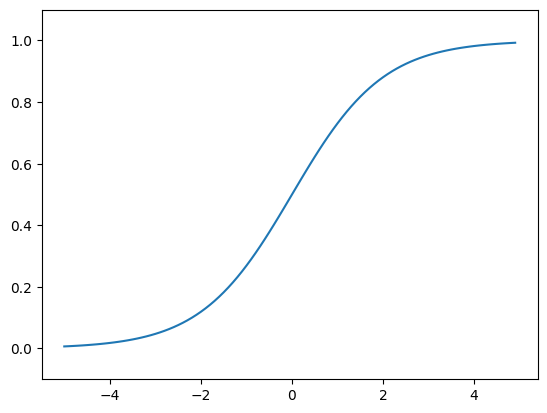

In [277]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

我们可以将sigmoid函数和step函数绘制在同一张图中：

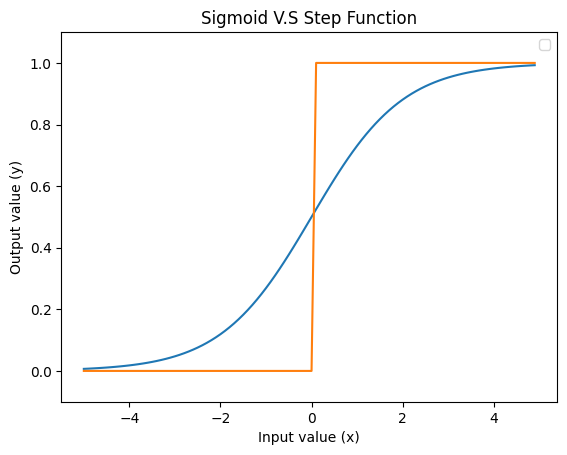

In [278]:
x = np.arange(-5.0, 5.0, 0.1)
y_sigmoid = sigmoid(x)
y_step = step_function(x)

plt.plot(x, y_sigmoid, label = "sigmoid")
plt.plot(x, y_step, label = 'step')
plt.ylim(-0.1, 1.1)
plt.legend('')
plt.title('Sigmoid V.S Step Function')
plt.xlabel('Input value (x)')
plt.ylabel('Output value (y)')

plt.show()

Sigmoid 相较于 Step 的两个优点在于：

1. sigmoid函数是连续的，具有平滑性
2. sigmoid函数可以输出0~1之间的实数

不过这两个函数也存在着一定的相似性，比如说他们都呈现出了，在输入小的时候，输出接近0，反之输出接近1。

此外，这两个函数还有一个共同的特点：非线性函数。

这是因为线性函数和线性函数的组合同样是线性函数：

是的，线性函数的组合（通过加法或标量乘法）仍然是一个线性函数。这一点可以通过线性代数中的线性映射的性质来证明。

假设有两个线性函数 $ f(x) $ 和 $ g(x) $，其中 $ f(x) = a_1x + b_1 $ 和 $ g(x) = a_2x + b_2 $，这里的 $ a_1, a_2 $ 是斜率，$ b_1, b_2 $ 是截距。

1. 加法：
   如果你将 $ f(x) $ 和 $ g(x) $ 相加，得到的函数是 $ (f+g)(x) = f(x) + g(x) = (a_1x + b_1) + (a_2x + b_2) $。这可以简化为 $ (f+g)(x) = (a_1 + a_2)x + (b_1 + b_2) $。这仍然是一个线性函数，斜率为 $ a_1 + a_2 $ 和截距为 $ b_1 + b_2 $。

2. 标量乘法：
   如果你用一个常数 $ c $ 来乘以 $ f(x) $，得到的函数是 $ (cf)(x) = c \cdot f(x) = c \cdot (a_1x + b_1) $。这可以分开为 $ (cf)(x) = (ca_1)x + (cb_1) $，也是一个线性函数，其斜率和截距分别是 $ ca_1 $ 和 $ cb_1 $。

这种性质的保持意味着，无论你如何组合线性函数（只要是通过加法和标量乘法），你最终仍然会得到一个线性函数。这是线性空间中函数的一种基本特征，反映了线性结构的稳定性和保持性。

除了sigmoid函数和Step函数之外，还有ReLU函数：

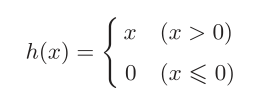

当输入的值小于等于0的时候，输出为0；反之则输出输入值。

In [279]:
def relu(x):
    return np.maximum(0, x)

进行可视化：

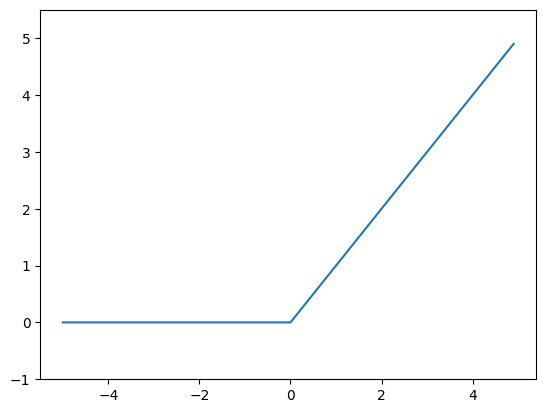

In [280]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-1, 5.5)
plt.show()

ReLU (Rectified Linear Unit) 和 Sigmoid 是两种常用的神经网络激活函数，它们各有特点和优势。在选择使用 ReLU 而不是 Sigmoid 作为激活函数时，主要基于以下几个优势：

1. **解决梯度消失问题**：
   - Sigmoid 函数在输入值非常大或非常小的时候导数接近于零，这导致在进行反向传播时，梯度会变得非常小，几乎不会对权重产生影响，从而导致“梯度消失”问题。这会使得训练深层网络变得非常困难。
   - ReLU 函数在正数区间的梯度恒为 1，这避免了梯度消失的问题，使得网络即使在很深的情况下也能更好地学习。

2. **计算效率**：
   - ReLU 的计算比 Sigmoid 简单得多。ReLU 只需要比较输入是否大于 0，而 Sigmoid 需要进行指数运算，计算成本较高。
   - 这种简单的计算使得使用 ReLU 的网络在训练和运行时更快，特别是在处理大规模数据集和复杂模型时。

3. **稀疏激活性**：
   - 在 ReLU 中，所有负输入都会被清零，这意味着网络中的不活跃神经元的输出为零。这产生了一个稀疏激活的模式，有利于节省计算资源和存储空间。
   - 稀疏性可以提高模型的学习能力，因为它迫使网络找到更重要的连接特征，并抑制不必要的。

4. **生物学上的可解释性**：
   - 从生物学的角度看，ReLU 更接近于神经元的实际工作方式，即它们只在超过某个阈值时才会激活。

然而，使用 ReLU 也有一些缺点，比如“死亡 ReLU 问题”，即一旦神经元的输入为负，则梯度将完全为零，这导致神经元在接下来的训练过程中不再更新。为了解决这个问题，后续研究提出了一些变体，如 Leaky ReLU 和 Parametric ReLU (PReLU)。

因此，在选择使用 ReLU 还是 Sigmoid，或者其他激活函数时，需要根据具体的应用场景和网络结构来做决策。

注意，水平直线可以被表示为y = b，亦或者是 $y = 0x^1 + b$，那么导数结果就是0。

# 多维数组

多维数组是一种数据结构，可以在多个维度上组织和存储数据。简单来说，它是数组的数组。每一个维度代表一个数组层次，允许我们以多个维度对数据进行索引和操作。多维数组广泛应用于科学计算、图像处理、机器学习等领域，因为它们能有效地表示和处理像图像（二维数组）、视频（三维数组），或其他更高维度的数据结构。在编程中，多维数组的实现和操作可以通过专门的库（如 NumPy）来简化，这些库提供了高效的数据存储和访问方式。

In [281]:
import numpy as np

A = np.array([1, 2, 3, 4])

In [282]:
A

array([1, 2, 3, 4])

In [283]:
np.ndim(A)  # ndim()给出维度

1

In [284]:
np.shape(A)  # 给出形状

(4,)

In [285]:
A.shape

(4,)

In [286]:
A.shape[0]  # 给出元素数量

4

需要注意，这是一个一维数组，返回的结果为(4,)，意思是有4个元素，但是因为是一维数组，所以没有行和列的概念。

接着来实现一个2维数组：

In [287]:
B = np.array([[1, 2], [3, 4], [5, 6]])

In [288]:
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [289]:
np.ndim(B)  # 查看维度

2

In [290]:
B.shape

(3, 2)

3个行，2个列。

In [291]:
C = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]]])

In [292]:
C

array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]])

In [293]:
C.ndim

3

3个维度。

In [294]:
C.shape

(1, 3, 3)

接着是矩阵乘法：

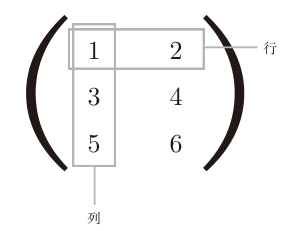

矩阵的横为行，竖为列。

这是乘法的运算过程：

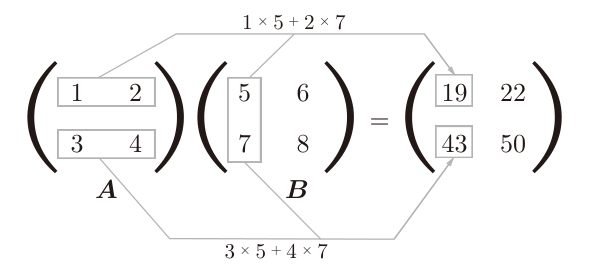

前一个矩阵的第一行，乘以后一个矩阵的第一列，然后将每个对应位置的元素乘积相加，得到新的矩阵的对应位置的数值。

In [295]:
# 用numpy来进行实现
A = np.array([[1, 2], [3, 4]])
A.shape

(2, 2)

In [296]:
B = np.array([[5, 6], [7, 8]])
B.shape

(2, 2)

然后使用dot()函数来求内积：

In [297]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

需要注意，矩阵乘法中矩阵的前后顺序是会影响结果的：

In [298]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [299]:
np.dot(B, A)

array([[23, 34],
       [31, 46]])

接着进行实现：

In [300]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])

In [301]:
print(A)

print(A.shape)

[[1 2 3]
 [4 5 6]]
(2, 3)


In [302]:
print(B)

print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
(3, 2)


然后求点积：

In [303]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

n * m 和 m * z 是可以进行相乘的，因为前者的列需要和后者的行数量一致。

In [304]:
# 否则会报错
C = np.array([[1, 2], [3, 4]])
C.shape

(2, 2)

In [305]:
D = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
D.shape

(3, 3)

In [306]:
try:
    np.dot(C, D)
except:
    print("两个矩阵不能够相乘")

两个矩阵不能够相乘


可视化：

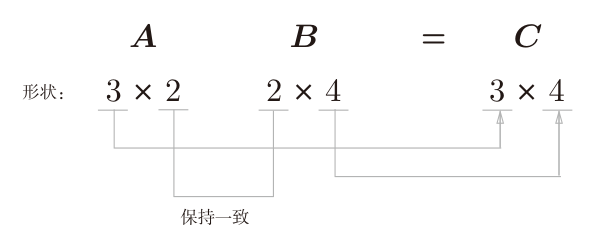

神经网络的内积可以这样进行表示：

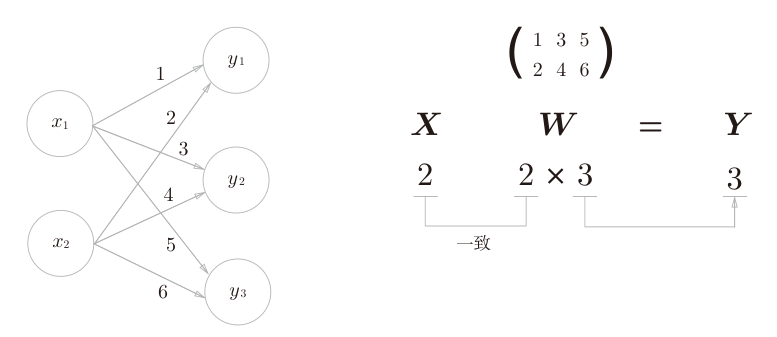

In [307]:
X = np.array([1, 2])
X.shape

(2,)

两个元素。

In [308]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [309]:
W.shape

(2, 3)

In [310]:
Y = np.dot(X, W)

In [311]:
print(Y)

[ 5 11 17]


通过这个方法，可以一次性计算出结果，无论Y的元素数量会是多少个。

# 3层神经网络的实现

神经网络的结构如下所示：

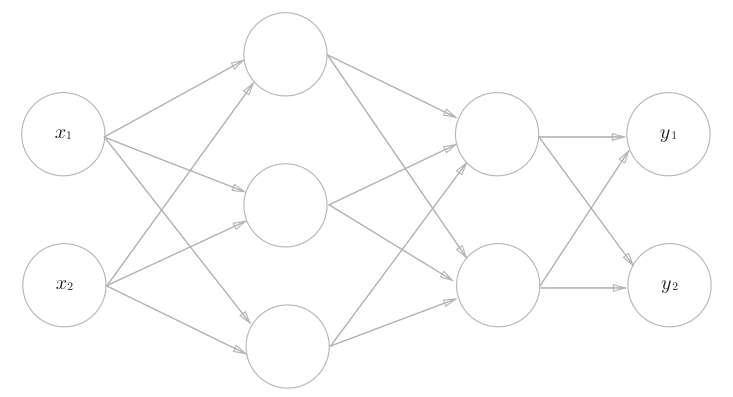

符号表示为：

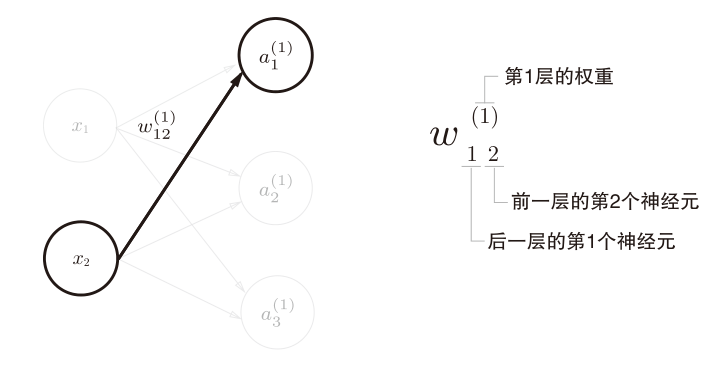

$w_{1 2}^{(1)}$ 中：

- 上角标表示的这个权重是神经网络的第几层的神经元使用的
- 下角标的第一个数字表示的是这个权重内用来计算后一层的第几个神经元
- 下角标的第二个数字表示的是这个权重是前一层的第几个神经元进行使用的

这是从输入层的第1层的第1个神经元信号传递过程：

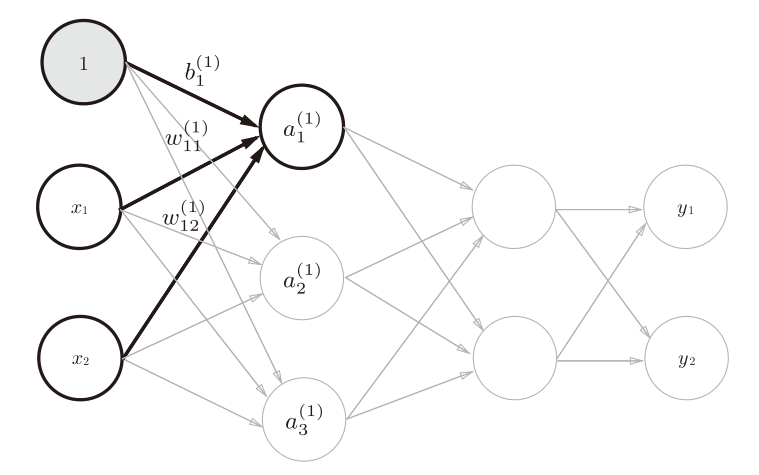

从输入层到第1层的信号传递。

偏置项的右下角只有一个索引，这是因为前一层的偏置神经元只有1个。

第二层的第一个神经元现在可以使用公式来进行表示：

$ a_{1}^{(1)} = w_{11}^{(1)}x_{1} + w_12^{(1)}x_{2} + b_{1}^{(1)}$

上述的公式可以使用矩阵乘法进行这样的表达：

$A^{(1)} = XW^{(1)} + B^{(1)} $

其中：

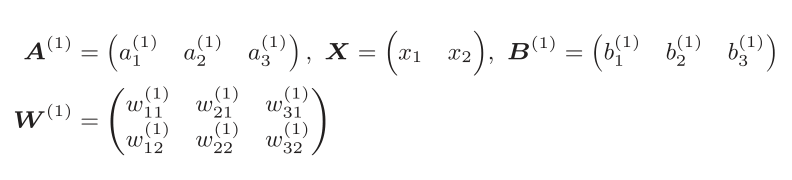

使用numpy来实现上面的公式：

In [312]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

In [313]:
print(W1.shape)

(2, 3)


In [314]:
print(B1.shape)

(3,)


In [315]:
A1 = np.dot(X, W1) + B1

In [316]:
A1

array([0.3, 0.7, 1.1])

在神经网络中，偏置项（Bias）通常是为每个神经元单独设置的，以便为每个神经元的输出提供一个独立的调整。这就是为什么偏置通常被表示为与神经网络中的每个神经元数量相同的数组。

如果将偏置项设置为一个单一的数字，那么这个值将会被广播到每个神经元上。这意味着每个神经元的偏置都是相同的，这在某些情况下可能不是最佳的设计选择，因为它减少了模型的灵活性和能力来独立地调整每个神经元的输出。

接着是该神经元的内部激活函数的作用：

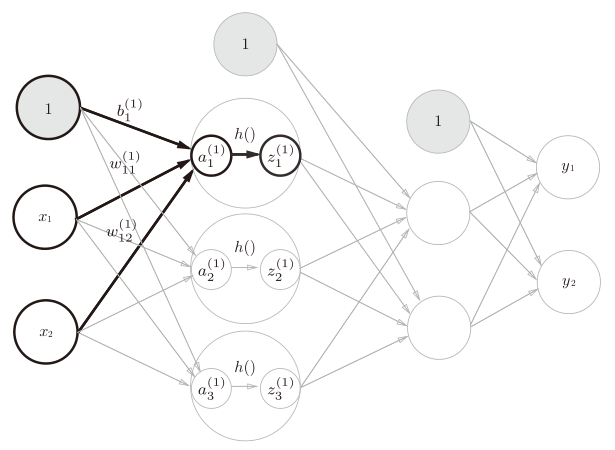

In [317]:
Z1 = sigmoid(A1)

In [318]:
print(Z1)

[0.57444252 0.66818777 0.75026011]


从第1层到第2层的信号传递：

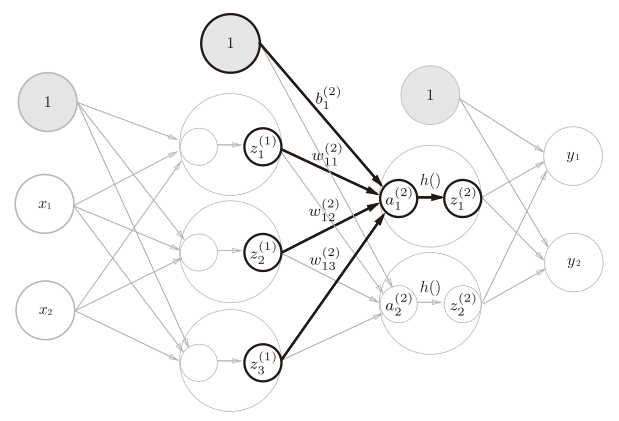

In [319]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [320]:
print(Z1.shape)

(3,)


In [321]:
print(W2.shape)

(3, 2)


In [322]:
print(B2.shape)

(2,)


In [323]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [324]:
Z2

array([0.62624937, 0.7710107 ])

B的数量取决于后一层的神经层的神经元的数量，而不是前一层的神经元的数量。

这段代码和之前的代码是一致的，除了第一层的输出（Z1）变成了第2层的输入。

接着是第2层到输出层的信号传递：

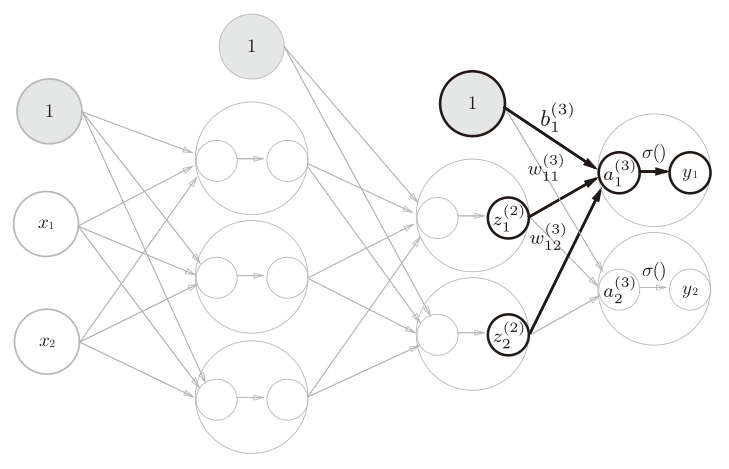

In [325]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [326]:
A3 = np.dot(Z2, W3) + B3

In [327]:
Y = identity_function(A3)

In [328]:
Y

array([0.31682708, 0.69627909])

这里定义了identity_function()函数，作为输出层的激活函数，恒等函数会将输入按照原样进行输出，因此这个部分的函数可以不用写成identity_function()，但是这么写能够保持流程和格式上的一致。

完整的代码如下所示：

In [329]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [ 0.31682708 0.69627909]

[0.31682708 0.69627909]


这里定义了 init_network()和 forward()函数。init_network()函数会进行权重和偏置的初始化，并将它们保存在字典变量 network中。这个字典变
量 network中保存了每一层所需的参数（权重和偏置）。forward()函数中则封装了将输入信号转换为输出信号的处理过程。

另外，这里出现了forward（前向）一词，它表示的是从输入到输出方向的传递处理。后面在进行神经网络的训练时，我们将介绍后向（backward，从输出到输入方向）的处理。

至此，神经网络的前向处理的实现就完成了。通过巧妙地使用NumPy多维数组，我们高效地实现了神经网络。

# 输出层的设计

神经网络可以用在分类问题和回归问题上，不过需要根据情况改变输出层的激活函数。

一般而言：

- 回归问题：用恒等函数
- 分类问题：用softmax函数

恒等函数：

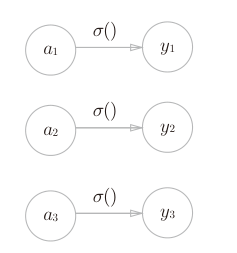

softmax函数：

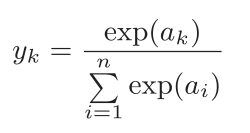

分子是输入信号 $a_{k}$的指数函数，分母是所有输入信号的指数函数的和。所以分母实际上是一个常数，对于每一个输入信号，其分母的值都是一致的。

可以表示为：

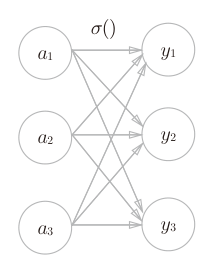

In [330]:
a = np.array([0.3, 2.9, 4.0])

In [331]:
exp_a = np.exp(a)

In [332]:
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


然后进行求和：

In [333]:
sum_exp_a =np.sum(exp_a)  # 指数函数的和

In [334]:
print(sum_exp_a)

74.1221542101633


In [335]:
y = exp_a / sum_exp_a

In [336]:
print(y)

[0.01821127 0.24519181 0.73659691]


可以发现，得到的结果其实是一个array，其中的每一个元素表示的是概率。

In [337]:
# 写成函数
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

实现softmax函数时的注意事项

计算机的运行是存在着一定缺陷的，这个缺陷就是溢出，指数函数的值可能会非常的大。

In [338]:
np.exp(20)

485165195.4097903

In [339]:
np.exp(200)

7.225973768125749e+86

In [340]:
import warnings

# 捕捉运行时警告作为一个异常
with warnings.catch_warnings():
    warnings.simplefilter("error")  # 将警告转换为错误
    try:
        # 尝试进行可能导致溢出的运算
        result = np.exp(2000)
        print("计算结果:", result)  # 安全地在try块内打印结果
    except RuntimeWarning:
        print("溢出")

溢出


所以softmax函数可以进行这样的修改：

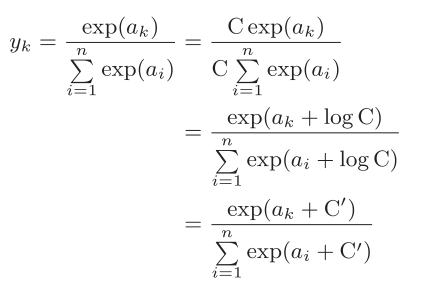

公式的上下同乘以一个常数C（不为0），那么得到的结果是不变的；接着将常数C移到exp中，因为C是常数，所以logC其实也是常数，用C'进行表示。上面的公式进行变化之后能够得到与原先的公式同样的结果。

注意：C'前面是一个+号，但是C'可以是一个负数，所以最终 $ a_{i} + C' $ 可能是 $ a_{i} - constantNumber $ 的形式。

虽然C'可以使用任何一个值，但是为了防止溢出，一般采用的是信号中的最大值：

In [341]:
a = np.array([1010, 1000, 990])

In [342]:
np.exp(a) / np.sum(np.exp(a))

C:\Users\wangj\AppData\Local\Temp\ipykernel_4008\1498923738.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
C:\Users\wangj\AppData\Local\Temp\ipykernel_4008\1498923738.py:1: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [343]:
c = np.max(a)

In [344]:
a - c

array([  0, -10, -20])

In [345]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

通过减去输入信号中的最大值，我们可以发现原本为nan的地方，现在被正确的计算了。

In [346]:
# 实现正确的函数
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # 溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

softmax的特征如下所示：

In [347]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [348]:
np.sum(y)

1.0

可以发现，结果的和为1，这是因为函数实际上是在计算属于不同类别的概率是多少。

可以解释成 y[0]的概率是0.018（1.8 %），y[1]的概率
是 0.245（24.5 %），y[2]的概率是 0.737（73.7 %）。从概率的结果来看，可以
说“因为第2个元素的概率最高，所以答案是第2个类别”。

另外这里需要注意的地方在于：指数函数是单调递增函数，也就是说a中各元素的大小关系和结果y中各元素的大小关系是一致的。

因此，如果a中的最大元素是第n个元素，那么y中的最大元素也是第n个元素。

所以在实际运算当中，考虑到计算机运行softmax函数需要使用运算资源，所以有些时候会省略掉softmax函数。

输出层的神经元的数量需要根据特定的问题来进行决定，对于分类问题，输出层的神经元的数量一般设定为类别的数量，比如说：输入某一个图像，预测图中的数字是0~9之间的哪个数字，可以通过设定输出层为10个类别来进行解决。

例子：

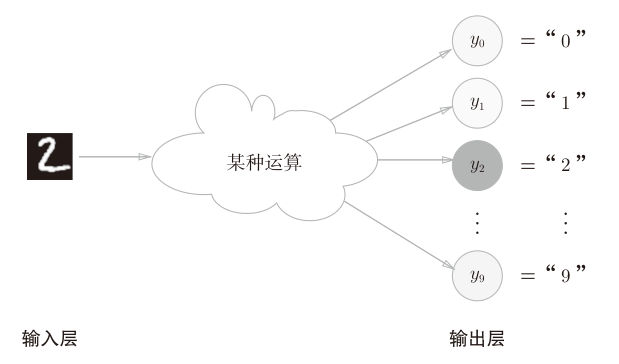

# 手写数字识别

首先下载MNIST数据集，这是一个手写数字识别的数据集。

In [349]:
import sys, os
sys.path.append(os.pardir) # 为了导入父目录中的文件而进行的设定
from dataset.mnist import load_mnist
# 第一次调用会花费几分钟 ……
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
# 输出各个数据的形状
print(x_train.shape) # (60000, 784)

print(t_train.shape) # (60000,)
print(x_test.shape) # (10000, 784)
print(t_test.shape) # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


上面的代码可能会报错，因为在爬取MNIST的时候可能会被服务器当成是爬虫给拒绝，这个是否就需要手动的将数据集导入到本地文件夹中。

load_mnist函数以“（训练图像，训练标签），（测试图像，测试标签）”的形式返回读入的MNIST数据。

此外，还可以像load_mnist(normalize = True, flatten = True, one_hot_label = False)这样，设置三个参数：

- normalize = True：将输入图像正则化为0\~1之间的值，如果设置为False，则图像会被保留为原先的0~255像素
- faltten = True：设置为是否展开输入图像，如果是False，则输入图像会保存为1x28x28的三位数组，若设置为True，则输入图像会被保存为由784个元素构成的一维数组
- one_hot：仅正确解标签为1，其余皆为0的数组，比如说[0, 0, 0, 1, 0, 0, 0]，当one_hot_label为False的时候，只是像7，2这样简单保存正确解标签

接着显示MNIST图像，同时也确认一下数据：

In [350]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,normalize=False)

img = x_train[0]
label = t_train[0]
print(label) # 5
print(img.shape) # (784,)

img = img.reshape(28, 28) # 把图像的形状变成原来的尺寸
print(img.shape) # (28, 28)

5
(784,)
(28, 28)


在处理图像数据，尤其是在使用神经网络进行图像识别任务时，常见的一个步骤是将图像从其原始的二维形状（例如，MNIST 数据集中的 28x28 像素）“展平”为一维数组。这样做有几个理由：

1. **兼容性**：
   - 多数机器学习算法，包括基本的神经网络，预期输入是一维特征向量。这些算法通常不处理二维或三维数据的空间结构。
   - 展平图像使得每个像素点都可以作为一个独立的特征输入到模型中。

2. **简化网络架构**：
   - 将图像展平为一维数组简化了网络的输入接口，不需要处理复杂的多维数据处理操作。
   - 对于全连接层（dense layer）来说，输入通常是一维向量。如果直接使用二维图像作为输入，需要更复杂的数据处理或特殊类型的网络层，如卷积层。

3. **数据预处理标准化**：
   - 在许多图像处理和机器学习框架中，数据预处理的一个标准步骤是将图像数据转换成一维形式，这样可以统一处理来自不同源的图像数据。

4. **减少数据维度处理的复杂性**：
   - 处理一维数据在技术和实现上比处理高维数据（如图像或视频的原始多维数组）简单。这样做有助于减少编程复杂性和执行时间。

在 MNIST 的示例中，图像原本以 28x28 的二维数组存储，每个数字的图像被展平成 784（28x28）个元素的一维数组。这样处理后，可以直接将每个图像作为一个长向量输入到神经网络中。然而，现代的深度学习方法，特别是涉及到卷积神经网络（CNNs）时，通常会保留图像的二维结构，这样可以更好地利用图像内的局部结构信息。

这里需要注意的是，flatten=True时读入的图像是以一列（一维）NumPy数组的形式保存的。因此，显示图像时，需要把它变为原来的28像素 × 28
像素的形状。可以通过 reshape()方法的参数指定期望的形状，更改NumPy数组的形状。此外，还需要把保存为NumPy数组的图像数据转换为PIL用的数据对象，这个转换处理由 Image.fromarray()来完成。

In [351]:
img_show(img)

也可以在jupyter lab中显示：

5
(784,)
(28, 28)


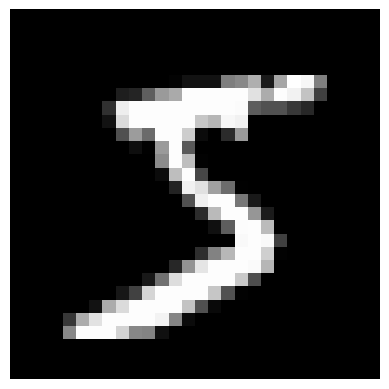

In [352]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image
import matplotlib.pyplot as plt

def img_show(img):
    plt.imshow(img, cmap='gray')  # 使用matplotlib显示图像，并设置颜色图为灰度
    plt.axis('off')  # 不显示坐标轴
    plt.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 输出标签 5
print(img.shape)  # 输出原始图像的形状 (784,)

img = img.reshape(28, 28)  # 把图像的形状变成原来的尺寸 28x28
print(img.shape)  # 输出变换后的图像形状 (28, 28)

img_show(img)  # 使用自定义的函数显示图像

接着对这个MNIST数据集实现神经网络的推理处理，神经网络的输入层由784个，输出层有10个神经元，输入层的784这个数字来自于图像大小，28*28=784，输出层的10这个数字来自于10个类别分类。

此外，这个神经网络2个隐藏层，第1个隐藏层有50个神经元，第2个隐藏层有100个神经元，当然这里的50和100可以设置为任何值。

In [355]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

init_network()会读入保存在pickle文件sample_weight.pkl中的学习到的权重参数。

In [356]:
# 测试一下性能
x, t = get_data()
network = init_network()

accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


将normalize设置为True之后，会将图像的各个像素值除以255，使得数据的值在0.0 /~ 1.0 的范围内，这样的操作称之为叫做正则化，而在整个深度学习的流程中这种对数据进行处理的行为被称之为叫做预处理。

In [357]:
# 输出一下刚才的神经网络的各层的权重的形状
x, _ = get_data()

In [358]:
network = init_network()

In [359]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [360]:
x.shape

(10000, 784)

In [361]:
x[0].shape

(784,)

In [362]:
W1.shape

(784, 50)

In [363]:
W2.shape

(50, 100)

In [364]:
W3.shape

(100, 10)

可以变成这样的一张图：

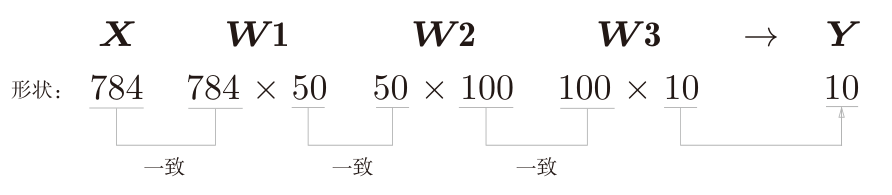

输入一个由784个元素构成的一维数组之后，输出一个10个元素的一维数组，这是只输入一张图像数据时的处理流程。

可以打包处理100张：

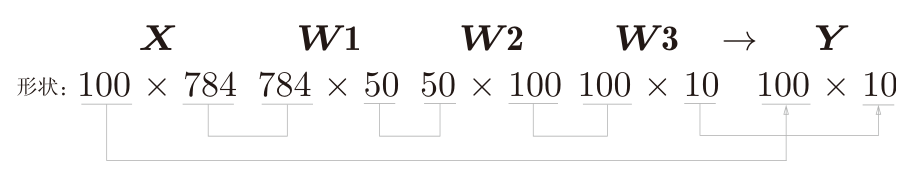

这样的话，100张的结果被同时输出了，比如说x[0]和y[0]中保存了第0张图像及其推理结果。

In [366]:
x, t = get_data()
network = init_network()
batch_size = 100 # 批数量
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


代码是计算整个测试集的分类精度的核心：

- for 循环以 batch_size 步长迭代测试数据集。每次迭代选取从 i 到 i + batch_size 的一批数据（x_batch）。
- predict(network, x_batch) 函数用这批数据进行预测，返回每个图像的分类结果（概率）。y_batch 是一个二维数组，其中每一行对应一个输入图像的预测结果。
- np.argmax(y_batch, axis=1) 从每一行的预测结果中找出最高概率的类别的索引，即模型对每个图像的预测类别。
- p == t[i:i+batch_size] 生成一个布尔数组，表示预测结果是否与真实标签相同。
- np.sum(p == t[i:i+batch_size]) 计算这批次中预测正确的数量，并累加到 accuracy_cnt 中。

In [367]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [369]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])

y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]


In [370]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)

[ True  True False  True]


In [371]:
np.sum(y==t)

3